<a href="https://colab.research.google.com/github/HitanshSondhi/EDA-PROJECT-1/blob/main/Eda%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/


'10 result.pdf'
 110018010209102022POS.TXT
 110018010209102022POS.TXT.gdoc
 22bds0325_Nubra.pdf
 22BDS0325.pdf
'adhaar card.pdf'
'again nothing give the table like format and expo....gsheet'
 Ai
'Analyzing Star Campaigner Election Impact.gdoc'
'A Thing of Beauty'
'Bihar Assembly Caste Power Analysis (1).gdoc'
'Bihar Assembly Caste Power Analysis (2).gdoc'
'Bihar Assembly Caste Power Analysis (3).gdoc'
'Bihar Assembly Caste Power Analysis.gdoc'
'Bihar Election Scheme & Operation Sindoor Analysis.gdoc'
'cn_lab3 (1).docx'
 cn_lab3.docx
 cnlab5.pdf
'Colab Notebooks'
'Communist Party of India (CPI)  full list.gsheet'
 ConfirmationPage-220310139648.pdf
'Copy of amazon_logo.png'
'Copy of box1_image.jpg'
'Copy of box2_image.jpg'
'Copy of box3_image.jpg'
'Copy of box4_image.jpg'
'Copy of box5_image.jpg'
'Copy of box6_image.jpg'
'Copy of box7_image.jpg'
'Copy of box8_image.jpg'
'Copy of hero_image.jpg'
'Copy of Uber Data Analytics.ipynb'
 dataset.csv
'deep learning'
'Deep learning final project'

To read the CSV file, you can use the pandas library. The following code will read the file into a DataFrame:

In [7]:
import pandas as pd

data  = pd.read_csv('/content/drive/MyDrive/dataset.csv')
display(data .head())

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,FALSE,Guns
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,FALSE,Guns
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,FALSE,Unarmed
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,FALSE,Other unusual objects
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,FALSE,Piercing objects


In [8]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [9]:
data = data.drop_duplicates()
data = data.dropna(subset=["age"])
data["age"] = data["age"].astype(int)
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%y", errors="coerce")


In [10]:
label_cols = ["gender", "race", "manner_of_death", "threat_level", "flee", "armed"]
for col in label_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

data = data.fillna(method="ffill")

/tmp/ipython-input-2690485900.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


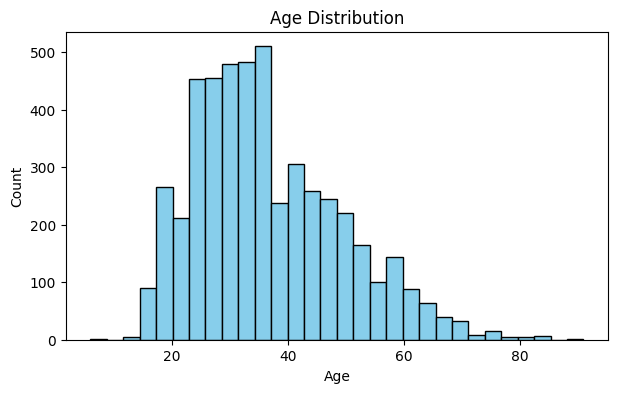

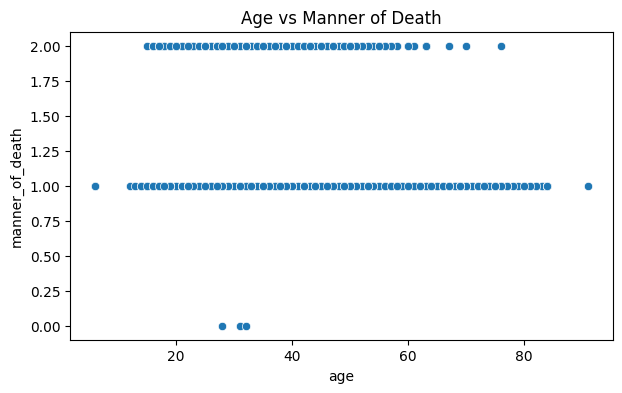

In [11]:
plt.figure(figsize=(7,4))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2D Visualization
plt.figure(figsize=(7,4))
sns.scatterplot(x="age", y="manner_of_death", data=data)
plt.title("Age vs Manner of Death")
plt.show()

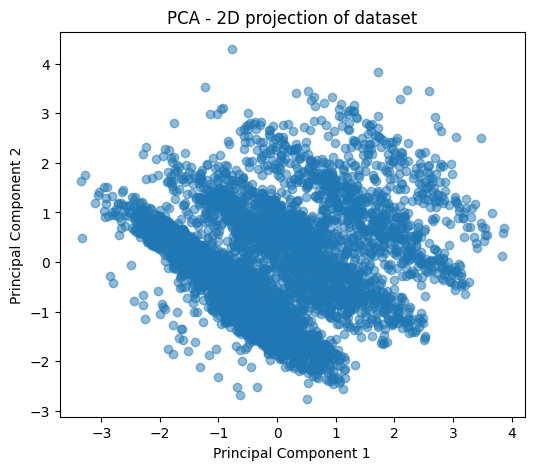

In [12]:
num_data = data.select_dtypes(include=[np.number])
scaled_data = StandardScaler().fit_transform(num_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(6,5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA - 2D projection of dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

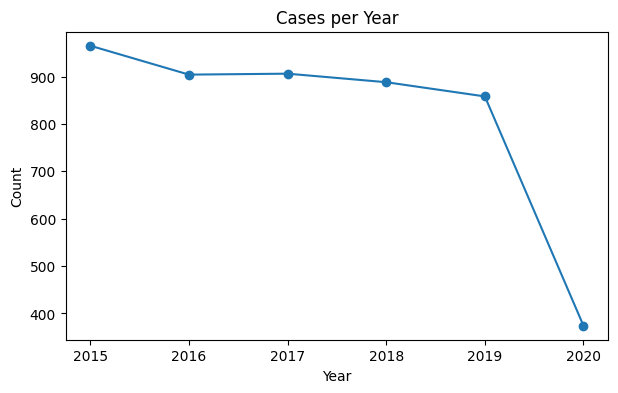

In [13]:
data["year"] = data["date"].dt.year
yearly = data.groupby("year")["id"].count()
plt.figure(figsize=(7,4))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Cases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [14]:
X = num_data.drop(columns=["threat_level", "id"])
y = num_data["threat_level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", round(acc * 100, 2), "%")

# Regression Model (predict age)
X_reg = num_data.drop(columns=["age", "id"])
y_reg = num_data["age"]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

Classification Accuracy: 65.17 %


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
reg = LinearRegression()
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

mse = mean_squared_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)
print("Regression MSE:", round(mse, 2))
print("Regression R² Score:", round(r2, 3))

Regression MSE: 141.27
Regression R² Score: 0.093


=== Classification Evaluation ===
Accuracy: 65.17 %


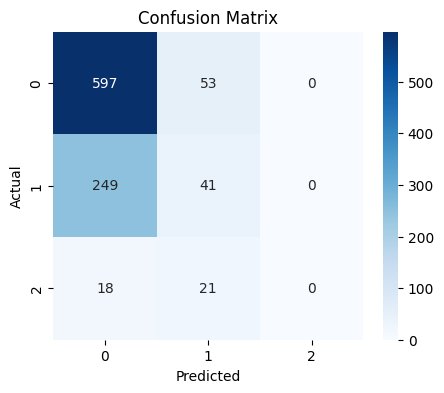


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       650
           1       0.36      0.14      0.20       290
           2       0.00      0.00      0.00        39

    accuracy                           0.65       979
   macro avg       0.35      0.35      0.33       979
weighted avg       0.56      0.65      0.58       979


=== Regression Evaluation ===
Mean Squared Error (MSE): 141.273
Root Mean Squared Error (RMSE): 11.886
R² Score: 0.093


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


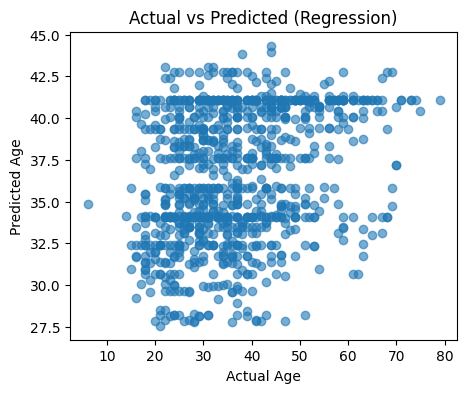

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ----- CLASSIFICATION MODEL EVALUATION -----
y_pred = clf.predict(X_test)

print("=== Classification Evaluation ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


# ----- REGRESSION MODEL EVALUATION -----
yr_pred = reg.predict(Xr_test)

print("\n=== Regression Evaluation ===")
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, yr_pred)

print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R² Score:", round(r2, 3))

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(5,4))
plt.scatter(yr_test, yr_pred, alpha=0.6)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted (Regression)")
plt.show()
